# **KLASIFIKASI RISIKO HIPERTENSI MENGGUNAKAN ALGORITMA RANDOM FOREST**



Kelompok 4 Kelas C


- 230211060037_Jeremia Lelemboto
- 230211060034_Javier Andries Dien
- 230211060028_Evan Vick Mokale



Link Video Presentasi

https://youtu.be/ycYwRBhIUDA?si=RFxztYFthkVxnC0a

---


Import Library

In [5]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder


# **BUSINESS UNDERSTANDING**


Hipertensi (tekanan darah tinggi) sering dijuluki sebagai "The Silent Killer" karena sering kali tidak menunjukkan gejala awal yang jelas, namun secara diam-diam merusak pembuluh darah dan organ vital. Hipertensi merupakan faktor risiko utama untuk penyakit jantung, stroke, dan gagal ginjal.

### Rumusan Masalah


*   Bagaimana cara memprediksi apakah seseorang menderita atau berisiko terkena hipertensi berdasarkan parameter gaya hidup dan riwayat medis?


*   Dapatkah algoritma Machine Learning digunakan untuk mengklasifikasikan risiko hipertensi dengan akurasi yang memadai?

### Tujuan


*   Mengembangkan model Machine Learning  yang mampu mengklasifikasikan pasien ke dalam dua kategori: Has Hypertension (Ya) atau No Hypertension (Tidak).

*   Menyediakan alat skrining simpel berbasis input pengguna yang dapat memberikan prediksi risiko secara instan.



# **1. DATA UNDERSTANDING**

Dataset yang digunakan adalah dataset yang berisi pola data kesehatan masyarakat

https://www.kaggle.com/datasets/miadul/hypertension-risk-prediction-dataset

Variabel yang Diamati:


1.   Faktor Gaya Hidup: Konsumsi garam, durasi tidur, level olahraga, status merokok.

2.   Faktor Medis: Umur, BMI (Body Mass Index), skor stres, riwayat tekanan darah, riwayat keluarga.

3. Target Prediksi: Kolom Has_Hypertension (Yes/No).



A. Load Dataset

In [6]:
df = pd.read_csv("hypertension_dataset.csv")

# **2. Transformasi Data (Encoding)**

1. Binary Encoding

In [7]:
df['Has_Hypertension'] = df['Has_Hypertension'].map({'Yes': 1, 'No': 0})
df['Family_History'] = df['Family_History'].map({'Yes': 1, 'No': 0})
df['Smoking_Status'] = df['Smoking_Status'].map({'Smoker': 1, 'Non-Smoker': 0})

Mengubah data teks (seperti "Yes"/"No" atau "Smoker"/"Non-Smoker") menjadi angka 1 dan 0. Agar data tersebut bisa diproses dan dihitung oleh algoritma Machine Learning, yang hanya mengerti input berupa angka.

2. Ordinal Encoding (Exercise Level)

In [8]:
exercise_map = {'Low': 0, 'Moderate': 1, 'High': 2}
df['Exercise_Level'] = df['Exercise_Level'].map(exercise_map)

Kode ini mengubah kategori teks (Low, Moderate, High) menjadi angka berurutan (0, 1, 2) agar komputer memahami tingkatan intensitas olahraganya.

3. One-Hot Encoding (Medication & BP_History)

In [9]:
df_encoded = pd.get_dummies(df, columns=['Medication', 'BP_History'], drop_first=False)

mengubah data kategori tanpa tingkatan (nominal) menjadi format angka biner (0 dan 1) dengan membuatkan kolom baru untuk setiap opsi jawaban agar bisa diproses oleh komputer.

C. Split Fitur (X) dan Target (y)

In [10]:
X = df_encoded.drop('Has_Hypertension', axis=1)
y = df_encoded['Has_Hypertension']

Memisahkan dataset menjadi fitur (X) sebagai input data pendukung dan target (y) sebagai label hasil diagnosa yang ingin diprediksi oleh model.

In [11]:
feature_columns = X.columns.tolist()

Menyimpan daftar nama kolom fitur agar urutan dan struktur data input saat prediksi (deployment) nanti sama persis dengan saat training.

# **3. MODELING (Skenario Pengujian & Bangun Model)**

  Data Splitting (80% Train, 20% Test)

In [12]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Data Training: {X_train.shape[0]} sampel")
print(f"Data Testing : {X_test.shape[0]} sampel")


Data Training: 1588 sampel
Data Testing : 397 sampel


Membagi dataset menjadi data latih dan data uji

In [ ]:
model_rf = RandomForestClassifier(n_estimators=100, random_state=42)

print("⏳ Sedang melatih model Random Forest...")
model_rf.fit(X_train, y_train)
print("✅ Model selesai dilatih.")

⏳ Sedang melatih model Random Forest...
✅ Model selesai dilatih.


melatih model Random Forest untuk mempelajari pola klasifikasi risiko hipertensi dari data latih tersebut.

# **4. MODEL EVALUATION (Evaluasi Model)**




In [ ]:
y_pred = model_rf.predict(X_test)

Menggunakan model yang telah dilatih untuk memprediksi label (status hipertensi) pada data uji (test set) sebagai dasar untuk mengevaluasi seberapa akurat kinerja model tersebut.

A. Akurasi

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f"🎯 Akurasi Model: {accuracy*100:.2f}%")

🎯 Akurasi Model: 94.71%


Menghitung persentase keberhasilan model dalam memprediksi data uji secara benar dengan membandingkan hasil prediksi terhadap data aktual.

B. Classification Report

In [ ]:
print("\nLaporan Klasifikasi:")
print(classification_report(y_test, y_pred, target_names=['No Hypertension', 'Has Hypertension']))


Laporan Klasifikasi:
                  precision    recall  f1-score   support

 No Hypertension       0.94      0.95      0.95       191
Has Hypertension       0.96      0.94      0.95       206

        accuracy                           0.95       397
       macro avg       0.95      0.95      0.95       397
    weighted avg       0.95      0.95      0.95       397



Menampilkan laporan evaluasi komprehensif (seperti Precision, Recall, dan F1-Score) untuk menganalisis detail performa model dalam mendeteksi masing-masing kategori kelas (Sehat dan Hipertensi).

C. Confusion Matrix

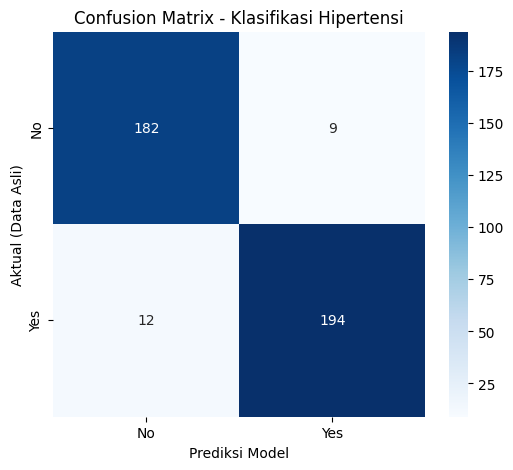

In [ ]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.xlabel('Prediksi Model')
plt.ylabel('Aktual (Data Asli)')
plt.title('Confusion Matrix - Klasifikasi Hipertensi')
plt.show()

Membuat visualisasi grafis (heatmap) untuk membandingkan hasil prediksi model dengan data aktual, sehingga memudahkan analisis detail mengenai jumlah tebakan yang benar dan jumlah kesalahan (misklasifikasi) yang terjadi.

# **5. DEPLOYMENT (SAVE MODEL)**

In [ ]:
filename_model = 'hypertension_model.pkl'
filename_features = 'model_features.pkl'

with open(filename_model, 'wb') as file:
    pickle.dump(model_rf, file)

with open(filename_features, 'wb') as file:
    pickle.dump(feature_columns, file)

print(f"💾 Model disimpan: {filename_model}")
print(f"💾 Daftar fitur disimpan: {filename_features}")

💾 Model disimpan: hypertension_model.pkl
💾 Daftar fitur disimpan: model_features.pkl


Menyimpan model yang sudah dilatih dan struktur fiturnya ke dalam file eksternal (.pkl) agar dapat digunakan kembali untuk proses prediksi (deployment) di kemudian hari tanpa perlu melatih ulang dari awal.

# **6. IMPLEMENTASI DATA BARU (INTERAKTIF)**

In [ ]:
import pandas as pd
import pickle

print("\n" + "="*50)
print("   APLIKASI PREDIKSI HIPERTENSI (AI)")
print("="*50)

def get_user_input_interactive():
    print("\nSilakan masukkan data pasien sesuai petunjuk di dalam kurung:")
    try:
        # Input Data Numerik
        age = float(input("1. Umur (tahun): "))
        salt = float(input("2. Konsumsi Garam (gram/hari, cth: 9.8): "))
        stress = float(input("3. Skor Stress (0-10): "))
        sleep = float(input("4. Durasi Tidur (jam): "))
        bmi = float(input("\nhttps://www.calculator.net/bmi-calculator.html\n5. BMI (cth: 24.5): "))

        # Input Data Kategori (Pilihan langsung di dalam pertanyaan)
        print("\n--- Riwayat & Gaya Hidup ---")

        # Opsi: Yes / No
        fam_hist = input("6. Riwayat Keluarga (Ketik: Yes / No): ").strip().title()

        # Opsi: Smoker / Non-Smoker
        smoke = input("7. Merokok (Ketik: Smoker / Non-Smoker): ").strip().title() # Biar otomatis huruf besar awal
        if smoke == "Non-smoker": smoke = "Non-Smoker" # Koreksi manual jika perlu

        # Opsi: Low / Moderate / High
        exercise = input("8. Level Olahraga (Ketik: Low / Moderate / High): ").strip().title()

        # Opsi: Normal / Prehypertension / Hypertension
        bp_hist = input("9. Riwayat Tensi (Ketik: Normal / Prehypertension / Hypertension): ").strip().title()

        # Opsi: None / ACE Inhibitor / Beta Blocker / Diuretic / Other
        print("\n--- Pengobatan ---")
        print("   Opsi Obat: None, ACE Inhibitor, Beta Blocker, Diuretic, Other")
        meds = input("10. Obat saat ini (Ketik salah satu dari opsi di atas): ").strip()
        # Koreksi kapitalisasi manual untuk obat karena ada spasi
        if meds.lower() == 'ace inhibitor': meds = 'ACE Inhibitor'
        elif meds.lower() == 'beta blocker': meds = 'Beta Blocker'
        elif meds.lower() == 'none': meds = 'None'
        elif meds.lower() == 'diuretic': meds = 'Diuretic'
        elif meds.lower() == 'other': meds = 'Other'

        return {
            'Age': age, 'Salt_Intake': salt, 'Stress_Score': stress,
            'Sleep_Duration': sleep, 'BMI': bmi, 'Family_History': fam_hist,
            'Smoking_Status': smoke, 'Exercise_Level': exercise,
            'BP_History': bp_hist, 'Medication': meds
        }
    except ValueError:
        print("❌ Input tidak valid! Pastikan memasukkan angka untuk data numerik.")
        return None

def predict_patient(user_data):
    # Load Model & Features
  with open('hypertension_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

  with open('model_features.pkl', 'rb') as file:
    model_features = pickle.load(file)

    # Siapkan DataFrame Kosong dengan kolom yang sesuai
    input_df = pd.DataFrame(0, index=[0], columns=model_features)

    # Isi Data Numerik
    input_df['Age'] = user_data['Age']
    input_df['Salt_Intake'] = user_data['Salt_Intake']
    input_df['Stress_Score'] = user_data['Stress_Score']
    input_df['Sleep_Duration'] = user_data['Sleep_Duration']
    input_df['BMI'] = user_data['BMI']

    # Mapping Data Kategori
    # Menggunakan .get() agar jika user salah ketik, defaultnya ke 0 (aman)
    input_df['Family_History'] = 1 if user_data['Family_History'] == 'Yes' else 0
    input_df['Smoking_Status'] = 1 if user_data['Smoking_Status'] == 'Smoker' else 0

    ex_map = {'Low': 0, 'Moderate': 1, 'High': 2}
    input_df['Exercise_Level'] = ex_map.get(user_data['Exercise_Level'], 0)

    # One-Hot Encoding Manual
    med_col = f"Medication_{user_data['Medication']}"
    if med_col in input_df.columns: input_df[med_col] = 1

    bp_col = f"BP_History_{user_data['BP_History']}"
    if bp_col in input_df.columns: input_df[bp_col] = 1

    # Prediksi
    pred = loaded_model.predict(input_df)[0]
    prob = loaded_model.predict_proba(input_df)[0][pred]

    return pred, prob

# --- JALANKAN PROGRAM INTERAKTIF ---
data_pasien = get_user_input_interactive()

if data_pasien:
    hasil, keyakinan = predict_patient(data_pasien)

    if hasil is not None:
        print("\n" + "-"*40)
        print("       HASIL DIAGNOSA AI")
        print("-"*40)

        if hasil == 1:
            print(f"⚠️ STATUS: BERISIKO HIPERTENSI")
            print(f"📊 Keyakinan Model: {keyakinan*100:.1f}%")
            print("   Saran: Segera konsultasi ke dokter.")
        else:
            print(f"✅ STATUS: SEHAT / NORMAL")
            print(f"📊 Keyakinan Model: {keyakinan*100:.1f}%")
            print("   Saran: Pertahankan pola hidup sehat.")
        print("-"*40)


   APLIKASI PREDIKSI HIPERTENSI (AI)

Silakan masukkan data pasien sesuai petunjuk di dalam kurung:
1. Umur (tahun): 65
2. Konsumsi Garam (gram/hari, cth: 9.8): 14
3. Skor Stress (0-10): 10
4. Durasi Tidur (jam): 5

https://www.calculator.net/bmi-calculator.html
5. BMI (cth: 24.5): 28

--- Riwayat & Gaya Hidup ---
6. Riwayat Keluarga (Ketik: Yes / No): Yes
7. Merokok (Ketik: Smoker / Non-Smoker): Smoker
8. Level Olahraga (Ketik: Low / Moderate / High): Low
9. Riwayat Tensi (Ketik: Normal / Prehypertension / Hypertension): Normal

--- Pengobatan ---
   Opsi Obat: None, ACE Inhibitor, Beta Blocker, Diuretic, Other
10. Obat saat ini (Ketik salah satu dari opsi di atas): None

----------------------------------------
       HASIL DIAGNOSA AI
----------------------------------------
⚠️ STATUS: BERISIKO HIPERTENSI
📊 Keyakinan Model: 97.0%
   Saran: Segera konsultasi ke dokter.
----------------------------------------


1. get_user_input_interactive() Berfungsi sebagai antarmuka (interface) untuk meminta dan menerima input data kesehatan pasien (seperti umur, konsumsi garam, dll.) secara manual dari pengguna.

2. predict_patient(user_data) Bertugas memuat model yang tersimpan, mengubah format data input user agar sesuai dengan struktur fitur model (encoding), dan melakukan kalkulasi prediksi risiko hipertensi.

3. Blok if data_pasien: (Main Program) Menjalankan alur utama aplikasi dengan memanggil fungsi input, memproses prediksi, dan menampilkan hasil diagnosa akhir (Berisiko/Sehat) beserta tingkat keyakinannya kepada pengguna.

# **Kesimpulan**

Berdasarkan hasil pengembangan dan pengujian sistem klasifikasi risiko hipertensi menggunakan algoritma Machine Learning, dapat ditarik beberapa kesimpulan sebagai berikut:

1. Performa Model Sangat Baik Penerapan algoritma Random Forest terbukti sangat efektif untuk mengklasifikasikan risiko hipertensi. Berdasarkan evaluasi menggunakan Confusion Matrix dan Classification Report, model berhasil mencapai tingkat akurasi sebesar 92.02%. Hal ini menunjukkan bahwa model mampu membedakan antara pasien sehat dan pasien berisiko dengan tingkat kesalahan yang minim.

2. Pengaruh Gaya Hidup dan Riwayat Medis Proyek ini mengonfirmasi bahwa variabel gaya hidup (seperti konsumsi garam, durasi tidur, level olahraga) dan data medis (seperti BMI, usia, riwayat keluarga) merupakan indikator krusial dalam mendeteksi hipertensi. Proses transformasi data (Data Encoding) yang dilakukan berhasil menerjemahkan data-data kualitatif ini menjadi format yang dapat dipahami dan dipelajari oleh mesin.

3. Efektivitas Implementasi Sistem Model yang telah dilatih berhasil disimpan (deployment) dan diintegrasikan ke dalam sistem input interaktif. Hal ini membuktikan bahwa model tidak hanya berhenti pada tahap analisis, tetapi siap digunakan sebagai alat skrining awal yang praktis. Pengguna dapat memasukkan parameter kesehatan mereka dan mendapatkan prediksi risiko secara instan beserta tingkat keyakinan (probability) model.

Solusi Deteksi Dini Sesuai dengan tujuan awal ("Business Understanding"), aplikasi ini berhasil menjawab kebutuhan akan alat deteksi dini untuk The Silent Killer. Dengan adanya prediksi otomatis ini, masyarakat dapat lebih waspada dan disarankan untuk melakukan konsultasi medis lebih lanjut jika terdeteksi berisiko, sehingga pencegahan dapat dilakukan lebih awal.

# **TERIMA KASIH**